### https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Feature%20Engineering-%20Normalization%20And%20Standardization-%20Day%205.ipynb

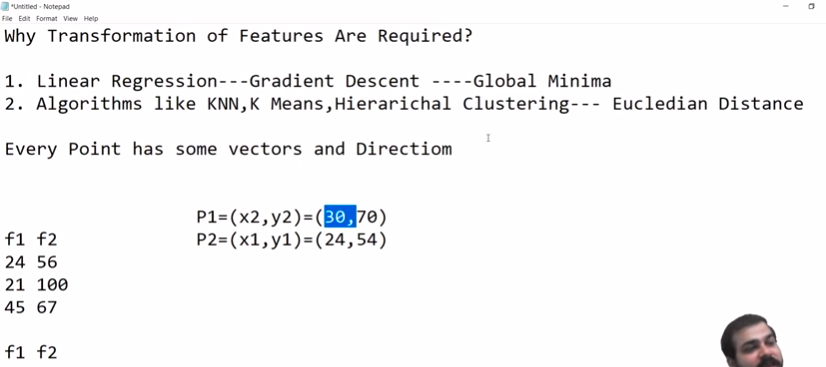

#### Scaling needs to be done only for algorithms which deals with calculating Eucledian or manhattan distance, gradient descent to learn it predict the value. E.g: Linear, Logistics,KNN,K means, Hieraichal Clutering etc.

#### Decision Tree, Random Forest, ADABoost, XGBoost etc which doesn't requires scaling

#### Deep Learning learning - ANN, CNN & RNN also requires standardization


**Transformation of Features **

Why Transformation of Features Are Required?

Linear Regression---Gradient Descent ----Global Minima
Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance
Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN

0-255 pixels

**Types Of Transformation**
- Normalization And Standardization
- Scaling to Minimum And Maximum values
- Scaling To Median And Quartiles
- Guassian Transformation 
    - Logarithmic Transformation 
    - Reciprocal Trnasformation 
    - Square Root Transformation
    - Exponential Trnasformation 
    - Box Cox Transformation

### 1. Standardization
- We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
  
  **z=(x-x_mean)/std**
  
Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In [4]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df = pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

Survived  Pclass   Age     Fare
0         0       3  22.0   7.2500
1         1       1  38.0  71.2833
2         1       3  26.0   7.9250
3         1       1  35.0  53.1000
4         0       3  35.0   8.0500

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [8]:
df.fillna(df['Age'].median(), inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [10]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(df)

In [11]:
df_scaled=pd.DataFrame(df_scaled)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df_scaled

0         1         2         3
0   -0.789272  0.827377 -0.565736 -0.502445
1    1.266990 -1.566107  0.663861  0.786845
2    1.266990  0.827377 -0.258337 -0.488854
3    1.266990 -1.566107  0.433312  0.420730
4   -0.789272  0.827377  0.433312 -0.486337
..        ...       ...       ...       ...
886 -0.789272 -0.369365 -0.181487 -0.386671
887  1.266990 -1.566107 -0.796286 -0.044381
888 -0.789272  0.827377 -0.104637 -0.176263
889  1.266990 -1.566107 -0.258337 -0.044381
890 -0.789272  0.827377  0.202762 -0.492378

[891 rows x 4 columns]

<class 'pandas.core.series.Series'>


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

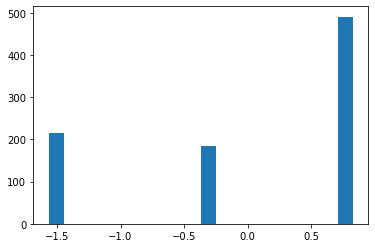

In [14]:
print(type(df_scaled[1]))
plt.hist(df_scaled[1],bins=20)

<class 'pandas.core.frame.DataFrame'>


/home/vinoth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

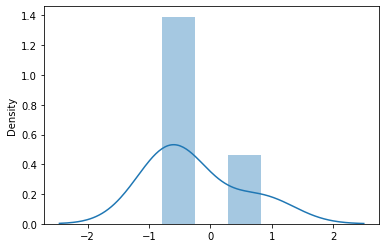

In [15]:
import seaborn as sns
#print(type(df_scaled['Age']))
print(type(df_scaled[:1]))
sns.distplot(df_scaled[:1])

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

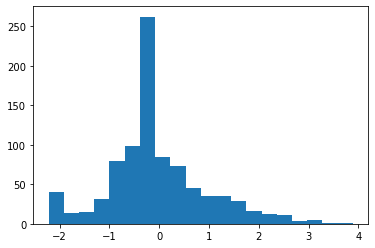

In [16]:
plt.hist(df_scaled[2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

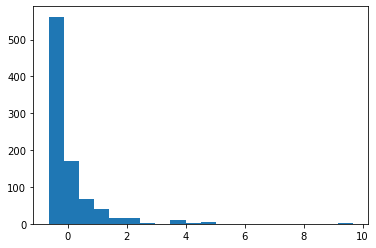

In [17]:
plt.hist(df_scaled[3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

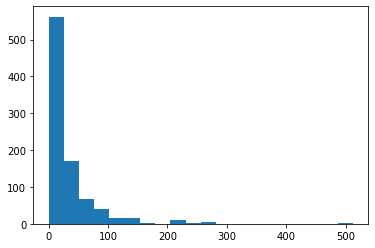

In [18]:
plt.hist(df['Fare'],bins=20)

<AxesSubplot:xlabel='Fare'>

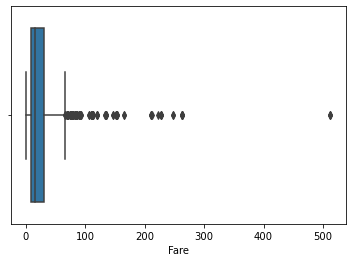

In [19]:
sns.boxplot(x="Fare",data=df)

### 2. Min Max Scaling (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. 

**X_scaled = (X - X.min / (X.max - X.min)**

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_min_max = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
df_min_max.head()

Survived  Pclass       Age      Fare
0       0.0     1.0  0.271174  0.014151
1       1.0     0.0  0.472229  0.139136
2       1.0     1.0  0.321438  0.015469
3       1.0     0.0  0.434531  0.103644
4       0.0     1.0  0.434531  0.015713

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

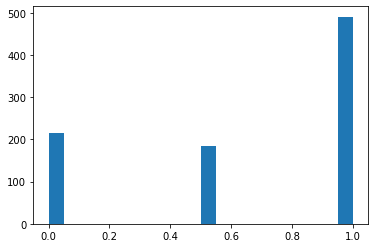

In [22]:
plt.hist(df_min_max['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

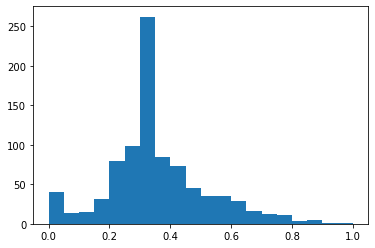

In [23]:
plt.hist(df_min_max['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

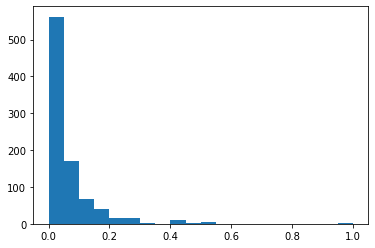

In [24]:
plt.hist(df_min_max['Fare'],bins=20)

### 3. Robust Scaler
It is used to scale the feature to median and quartile Scaling using median and quartile consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquartile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

**X_scaled = (X - X.median) / IQR**

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 

1-10 precentile---10% of all values in this group is less than 1 4-40%

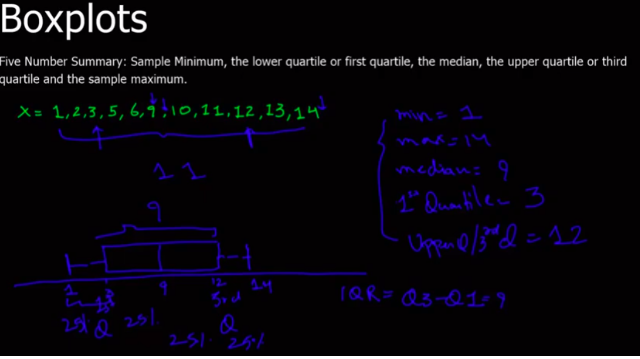

In [29]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust.head()

Survived  Pclass       Age      Fare
0       0.0     0.0 -0.461538 -0.312011
1       1.0    -2.0  0.769231  2.461242
2       1.0     0.0 -0.153846 -0.282777
3       1.0    -2.0  0.538462  1.673732
4       0.0     0.0  0.538462 -0.277363

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

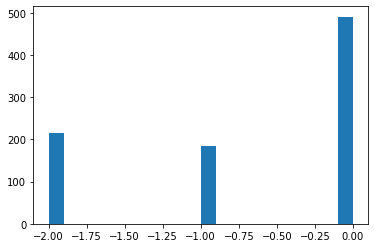

In [30]:
plt.hist(df_robust['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

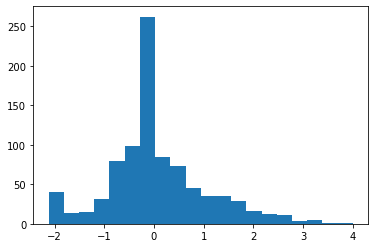

In [31]:
plt.hist(df_robust['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

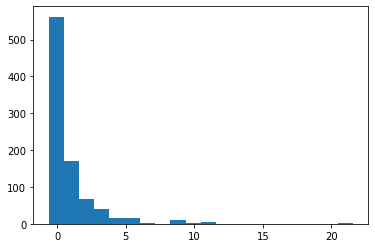

In [32]:
plt.hist(df_robust['Fare'],bins=20)

### 4. Gaussian distribution

Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

- Logarithmic Transformation 
- Reciprocal Trnasformation 
- Square Root Transformation
- Exponential Trnasformation 
- Box Cox Transformation

In [52]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [53]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [54]:
df.fillna(df.median(),inplace=True)

In [55]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [56]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [57]:
import scipy.stats as stat
import pylab

In [60]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    #print(df[feature])
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab) 
    plt.show()

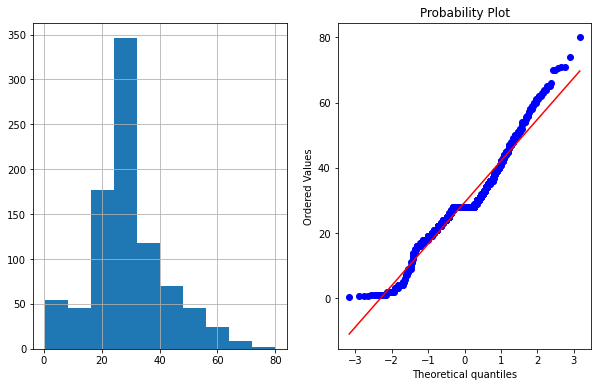

In [61]:
plot_data(df,'Age')

#### Logarithmic Transformation

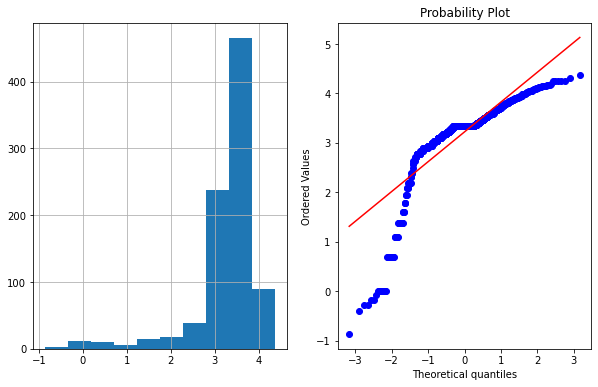

In [62]:
import numpy as np
df['Age_log'] = np.log(df['Age'])
plot_data(df,'Age_log')

#### Reciprocal Transformation

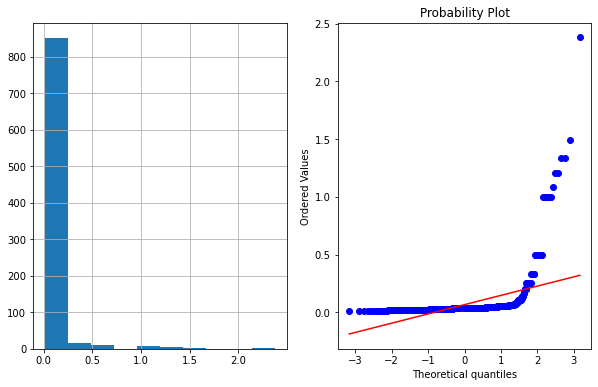

In [63]:

df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

#### Square Root Transformation

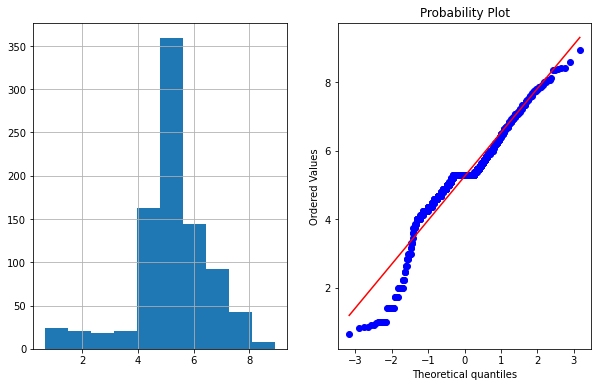

In [64]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

#### Exponential Transdormation

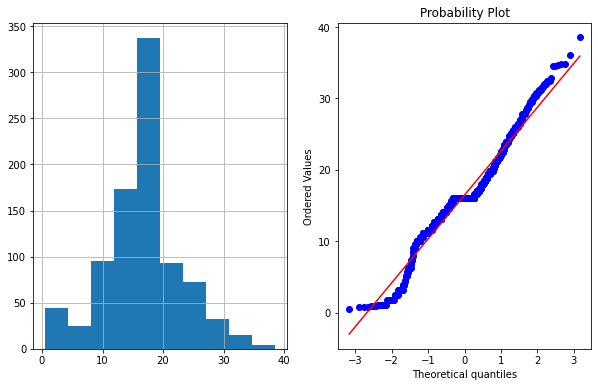

In [66]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### BoxCox Transformation
The Box-Cox transformation is defined as:

**T(Y)=(Y exp(λ)−1)/λ**

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [67]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [68]:
print(parameters)

0.7964531473656952


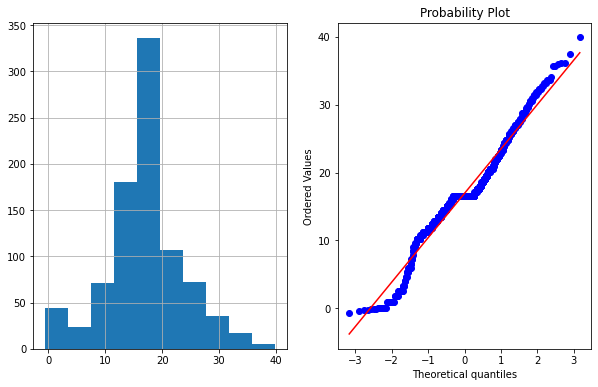

In [69]:
plot_data(df,'Age_Boxcox')